In [7]:
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [8]:
from sklearn.datasets import fetch_california_housing

# 보스턴 집값 데이터셋 불러오기
boston = fetch_california_housing()
print("Boston Housing Dataset:")
print(boston.data.shape)  # 데이터의 형태 확인
print(boston.feature_names)  # 입력 변수들의 이름 확인

Boston Housing Dataset:
(20640, 8)
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [4]:
boston.data

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [9]:
df = boston.data
target = boston.target

In [10]:
df

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [11]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
input = ss.fit_transform(df)

In [12]:
input.shape

(20640, 8)

In [13]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(input, target, test_size=0.2)

In [10]:
train_input.shape

(16512, 8)

In [14]:
history_list = []

def test_activation(activation, title=None, learning_rate=1e-4, patience=3, epochs=100, return_list = False, no_limit=False):
    from graph import paint_graph
    model = keras.Sequential([
    layers.Dense(128, activation=activation),
    layers.Dropout(0.1),
    layers.Dense(64, activation=activation),
    layers.Dropout(0.1),
    layers.Dense(32, activation=activation),
    layers.Dense(1)
    ])
    
    adam = keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(loss='mean_absolute_error', optimizer=adam)
    Early_stopping_cb = keras.callbacks.EarlyStopping(patience=patience, restore_best_weights=True)
    if no_limit:
        history = model.fit(train_input, train_target, epochs=epochs,
                            validation_data=(test_input, test_target))
    else:
        history = model.fit(train_input, train_target, epochs=epochs, 
                        validation_data=(test_input, test_target),
                        callbacks=[Early_stopping_cb])
    paint_graph(history, title=title) # 해당 activation function의 loss-epochs 그래프를 그려주는 함수
    
    if return_list:
        return {title:history}

Epoch 1/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.8978 - val_loss: 0.8760
Epoch 2/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.8567 - val_loss: 0.8226
Epoch 3/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.7935 - val_loss: 0.6803
Epoch 4/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.6539 - val_loss: 0.5795
Epoch 5/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.6061 - val_loss: 0.5525
Epoch 6/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5830 - val_loss: 0.5358
Epoch 7/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5679 - val_loss: 0.5220
Epoch 8/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5498 - val_loss: 0.5103
Epoch 9/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5480 - val_loss: 0.5020
Epoch 10/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5257 - val_loss: 0.4943
Epoch 11/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5168 - val_loss: 0.4885
Epoch 12/100
516/516 ━━━━━━━━━━━━━━━━━━━━

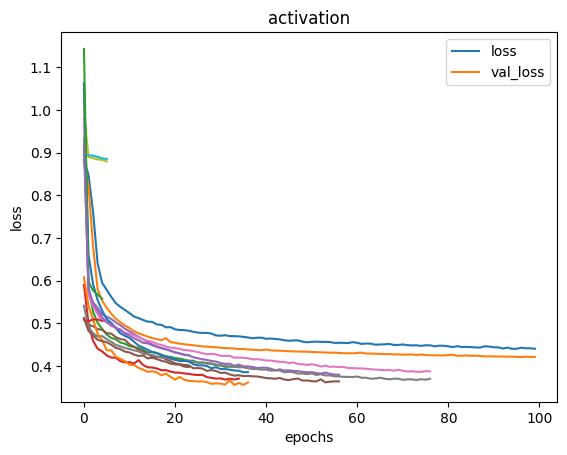

In [16]:
from activation_function_ import volcano_function, junsung_activation, y_x, MadeInChina
from varname import nameof

activation_list = ['sigmoid', 'relu', 'tanh', 'elu', volcano_function, junsung_activation, y_x, MadeInChina]
history_list = []

for activation in activation_list:
    if type(activation) == str:
        history_list.append(test_activation(activation, title=activation, return_list=True))
    else:
        history_list.append(test_activation(activation, title=nameof(activation), return_list=True))

In [34]:
history_list

[{'sigmoid': <keras.src.callbacks.history.History at 0x168afa2b450>},
 {'relu': <keras.src.callbacks.history.History at 0x168b4b2ffd0>},
 {'tanh': <keras.src.callbacks.history.History at 0x168b5f351d0>},
 {'elu': <keras.src.callbacks.history.History at 0x168b92a4610>},
 {'activation': <keras.src.callbacks.history.History at 0x168ba707510>},
 {'activation': <keras.src.callbacks.history.History at 0x168baab1110>},
 {'activation': <keras.src.callbacks.history.History at 0x168bcd36ad0>},
 {'activation': <keras.src.callbacks.history.History at 0x168bddf50d0>}]

In [46]:
# volcano, junsung, y=x, 5_squared ReLU
name_list = ['volcano', 'tiltedS', 'y=x', '5_squared ReLU']
for i in range(len(history_list)):
    if i >= 4:
        history_list[i] = {name_list[i-4] : list(history_list[i].items())[0][1]}
        
history_list

[{'sigmoid': <keras.src.callbacks.history.History at 0x168afa2b450>},
 {'relu': <keras.src.callbacks.history.History at 0x168b4b2ffd0>},
 {'tanh': <keras.src.callbacks.history.History at 0x168b5f351d0>},
 {'elu': <keras.src.callbacks.history.History at 0x168b92a4610>},
 {'volcano': <keras.src.callbacks.history.History at 0x168ba707510>},
 {'tiltedS': <keras.src.callbacks.history.History at 0x168baab1110>},
 {'y=x': <keras.src.callbacks.history.History at 0x168bcd36ad0>},
 {'5_squared ReLU': <keras.src.callbacks.history.History at 0x168bddf50d0>}]

In [20]:
def sin(x):
    return tf.sin(x)

Epoch 1/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.5572 - val_loss: 0.5174
Epoch 2/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5872 - val_loss: 0.5060
Epoch 3/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5512 - val_loss: 0.5017
Epoch 4/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5385 - val_loss: 0.4917
Epoch 5/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5398 - val_loss: 0.4958
Epoch 6/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5234 - val_loss: 0.4824
Epoch 7/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5152 - val_loss: 0.4761
Epoch 8/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5115 - val_loss: 0.4776
Epoch 9/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5066 - val_loss: 0.4703
Epoch 10/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4983 - val_loss: 0.4662
Epoch 11/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4927 - val_loss: 0.4650
Epoch 12/100
516/516 ━━━━━━━━━━━━━━━━━━━━

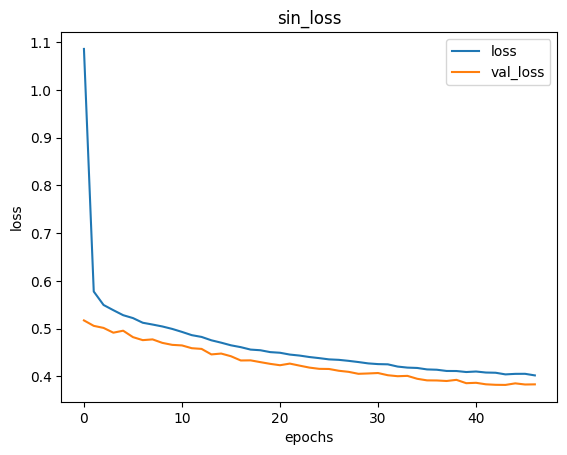

In [47]:
sin_loss = test_activation(sin, title='sin_loss', return_list=True)

In [52]:
history_list.append(sin_loss)
history_list

[{'sigmoid': <keras.src.callbacks.history.History at 0x168afa2b450>},
 {'relu': <keras.src.callbacks.history.History at 0x168b4b2ffd0>},
 {'tanh': <keras.src.callbacks.history.History at 0x168b5f351d0>},
 {'elu': <keras.src.callbacks.history.History at 0x168b92a4610>},
 {'volcano': <keras.src.callbacks.history.History at 0x168ba707510>},
 {'tiltedS': <keras.src.callbacks.history.History at 0x168baab1110>},
 {'y=x': <keras.src.callbacks.history.History at 0x168bcd36ad0>},
 {'5_squared ReLU': <keras.src.callbacks.history.History at 0x168bddf50d0>},
 {'sin_loss': <keras.src.callbacks.history.History at 0x168c6b7f190>}]

In [62]:
history_list[0], history_list[4], history_list[6], history_list[8], history_list[5] = history_list[6], history_list[0], history_list[4], history_list[5], history_list[8]
history_list 

[{'y=x': <keras.src.callbacks.history.History at 0x168bcd36ad0>},
 {'relu': <keras.src.callbacks.history.History at 0x168b4b2ffd0>},
 {'tanh': <keras.src.callbacks.history.History at 0x168b5f351d0>},
 {'elu': <keras.src.callbacks.history.History at 0x168b92a4610>},
 {'sigmoid': <keras.src.callbacks.history.History at 0x168afa2b450>},
 {'sin_loss': <keras.src.callbacks.history.History at 0x168c6b7f190>},
 {'volcano': <keras.src.callbacks.history.History at 0x168ba707510>},
 {'5_squared ReLU': <keras.src.callbacks.history.History at 0x168bddf50d0>},
 {'tiltedS': <keras.src.callbacks.history.History at 0x168baab1110>}]

In [53]:
from graph import paint_graph

In [59]:
list(history_list[1].values())[0]

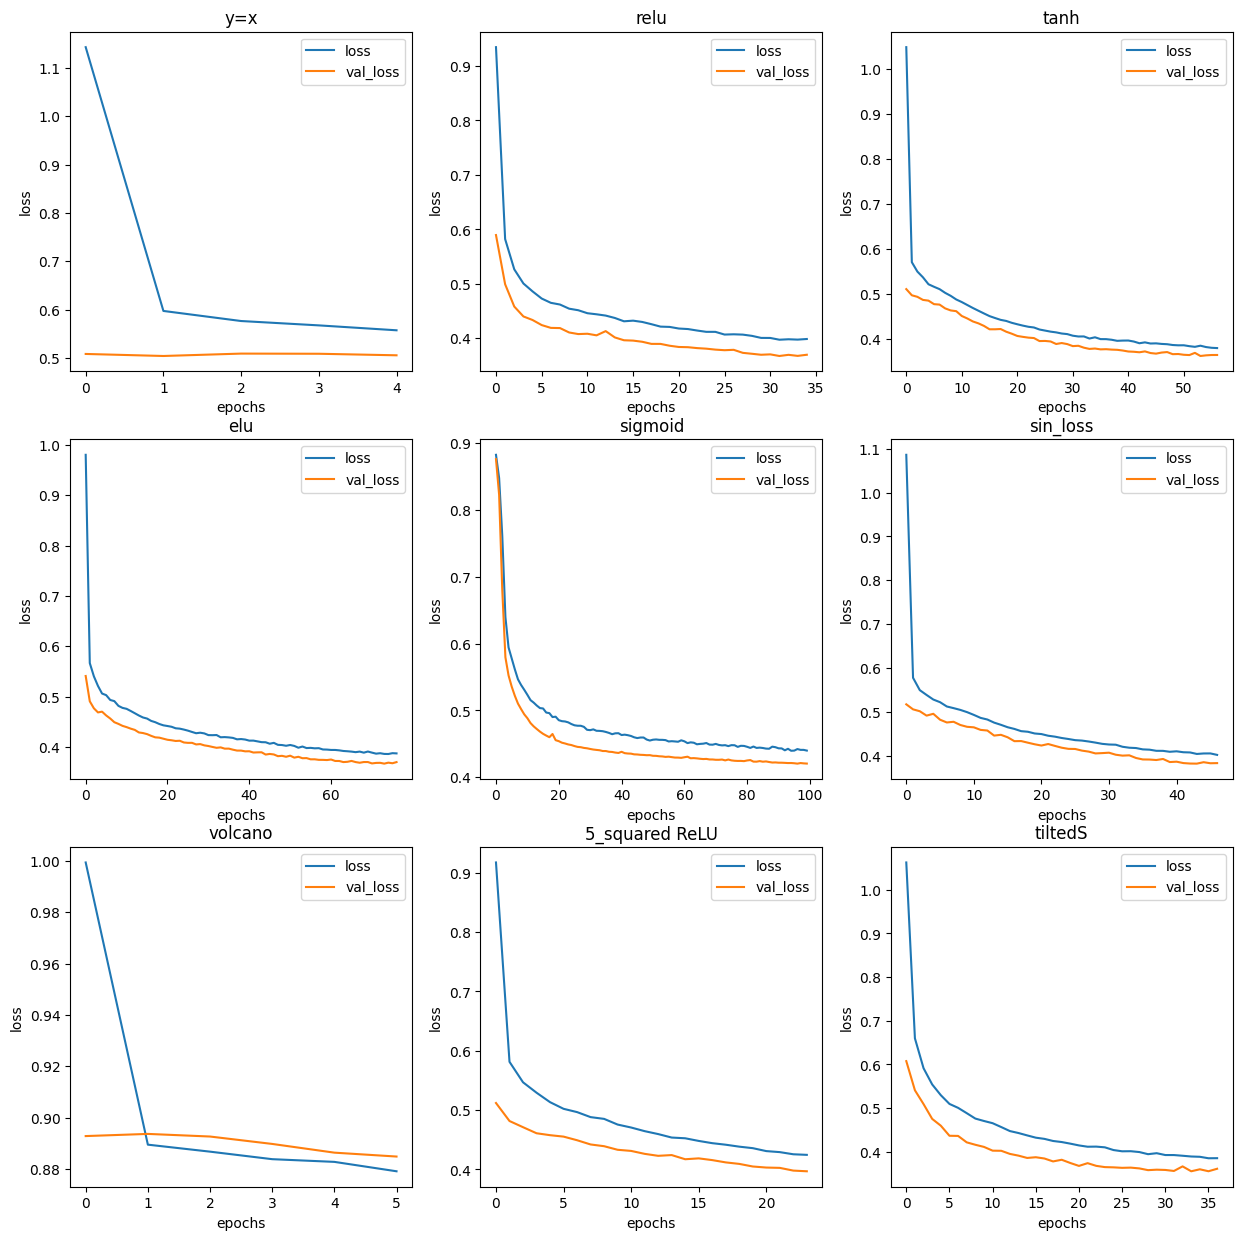

In [63]:
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

temp = 0
for i in range(3):
    for j in range(3):
        if temp == 8:
            paint_graph(list(history_list[temp].values())[0], title=list(history_list[temp].keys())[0], ax=axs[i, j], show_graph=True)
        else:
            paint_graph(list(history_list[temp].values())[0], title=list(history_list[temp].keys())[0], ax=axs[i, j])
            temp += 1
        